# Titanic: Machine Learning from Disaster



## Introduction

This is an experiment with [kaggle Titanic machine learning for disaster](https://www.kaggle.com/c/titanic) problem. First I will try to visualize the data to get a better intution about the data. Then by using various machine learning model I will try to predict the survival of passenger on the test data.

In [68]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer # to be used for dealing with NaN values in the data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder # for categorical data
%matplotlib inline

In [69]:
# loading traing and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Data preprocessing and Visualization

There is a couple of features which I am going to drop such as passengerId, Name etc.

In [71]:
drop_features = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_data.drop(drop_features, axis=1, inplace=True)
test_data.drop(drop_features, axis=1, inplace=True)
train_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Now let's quickly draw some figures to get a deeper insight of the data

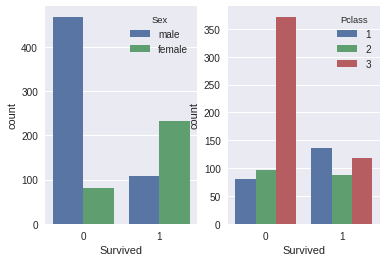

In [72]:
fig, ax =plt.subplots(1,2)
sns.countplot(x='Survived',hue='Sex', data=train_data, ax=ax[0])
sns.countplot(x='Survived',hue='Pclass', data=train_data, ax=ax[1])